# Example attribute inference attack calls

In [1]:
import os
import sys

from sklearn.ensemble import RandomForestClassifier

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("")))
sys.path.append(ROOT_DIR)

from attack_utilities.data import HospitalData, NurseryData
import attack_utilities.attribute_inference as aia
from safemodel.classifiers import SafeRandomForestClassifier

R_STATE = 1  # random seed

INFO:/home/unknown/GRAIMatter/data_preprocessing/data_interface.py:ROOT PROJECT FOLDER = /home/unknown/GRAIMatter


## Hospital dataset

In [2]:
dataset = HospitalData(R_STATE)

INFO:/home/unknown/GRAIMatter/data_preprocessing/data_interface.py:DATASET FOLDER = /home/unknown/GRAIMatter/data
INFO:data:{0: {'name': 'age', 'indices': [0], 'encoding': 'int64'}, 1: {'name': 'gendera', 'indices': [1], 'encoding': 'int64'}, 2: {'name': 'BMI', 'indices': [2], 'encoding': 'float64'}, 3: {'name': 'hypertensive', 'indices': [3], 'encoding': 'int64'}, 4: {'name': 'atrialfibrillation', 'indices': [4], 'encoding': 'int64'}, 5: {'name': 'CHD with no MI', 'indices': [5], 'encoding': 'int64'}, 6: {'name': 'diabetes', 'indices': [6], 'encoding': 'int64'}, 7: {'name': 'deficiencyanemias', 'indices': [7], 'encoding': 'int64'}, 8: {'name': 'depression', 'indices': [8], 'encoding': 'int64'}, 9: {'name': 'Hyperlipemia', 'indices': [9], 'encoding': 'int64'}, 10: {'name': 'Renal failure', 'indices': [10], 'encoding': 'int64'}, 11: {'name': 'COPD', 'indices': [11], 'encoding': 'int64'}, 12: {'name': 'heart rate', 'indices': [12], 'encoding': 'float64'}, 13: {'name': 'Systolic blood pre

In [3]:
dataset.data.describe()

,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,72.514019,1.516355,30.858403,0.703271,0.422897,0.067757,0.457944,0.336449,0.130841,0.343458,...,139.326967,8.448076,102.614122,14.116525,2.135186,7.374790,26.820936,1.900347,45.381160,48.154206
std,13.424689,0.500317,9.630081,0.457351,0.494598,0.251623,0.498811,0.473047,0.337621,0.475418,...,3.926662,0.563461,5.200159,2.644287,0.242133,0.065736,5.621605,0.997925,13.019605,13.043058
min,35.000000,1.000000,13.673625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.045455,6.700000,85.642857,7.777778,1.414286,7.158333,12.857143,0.500000,19.500000,15.000000
25%,63.000000,1.000000,24.431441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,8.089722,99.305769,12.250000,1.978750,7.330000,23.000000,1.200000,36.958333,40.000000
50%,74.000000,2.000000,28.429763,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,139.727273,8.440833,102.636364,13.891176,2.100000,7.375778,26.186813,1.660000,42.450000,55.000000
75%,84.000000,2.000000,34.460033,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,142.000000,8.800000,105.865079,15.673077,2.243506,7.425000,29.750000,2.300000,50.520833,55.000000
max,99.000000,2.000000,83.264629,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,149.133333,10.950000,117.315789,25.272727,4.072727,7.560000,47.666667,6.725000,98.600000,75.000000


In [4]:
# train model
target = RandomForestClassifier(bootstrap=False, random_state=R_STATE)
target.fit(dataset.x_train, dataset.y_train)
acc_train = target.score(dataset.x_train, dataset.y_train)
acc_test = target.score(dataset.x_test, dataset.y_test)
print(f"Base model train accuracy: {acc_train}")
print(f"Base model test accuracy: {acc_test}")

Base model train accuracy: 1.0
Base model test accuracy: 0.8644859813084113


In [5]:
# perform attacks
results = aia.attribute_inference(target, dataset, report=True)

INFO:aia:Attacking dataset: in-hospital-mortality
INFO:aia:Attacking categorical attributes...
INFO:aia:Attacking continuous attributes...


Attacking categorical feature age with 60 unique values:
Correctly inferred 100.00% of 0.93% of the training set; baseline: 11.68%
Correctly inferred 0.00% of 0.47% of the test set; baseline: 7.48%

Attacking categorical feature gendera with 2 unique values:
Correctly inferred 100.00% of 19.16% of the training set; baseline: 50.00%
Correctly inferred 79.41% of 15.89% of the test set; baseline: 53.27%

Attacking categorical feature hypertensive with 2 unique values:
Correctly inferred 100.00% of 15.42% of the training set; baseline: 71.50%
Correctly inferred 46.43% of 13.08% of the test set; baseline: 69.16%

Attacking categorical feature atrialfibrillation with 2 unique values:
Correctly inferred 100.00% of 5.61% of the training set; baseline: 60.75%
Correctly inferred 40.00% of 4.67% of the test set; baseline: 54.67%

Attacking categorical feature CHD with no MI with 2 unique values:
Correctly inferred 100.00% of 33.18% of the training set; baseline: 92.99%
Correctly inferred 72.37% o

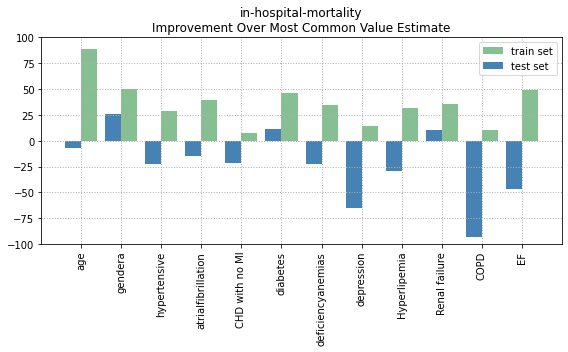

In [6]:
aia.plot_categorical_risk(results)

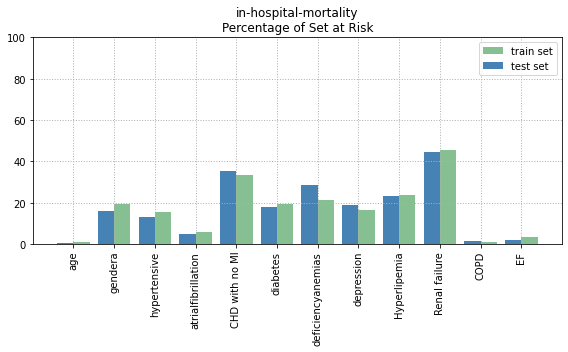

In [7]:
aia.plot_categorical_fraction(results)

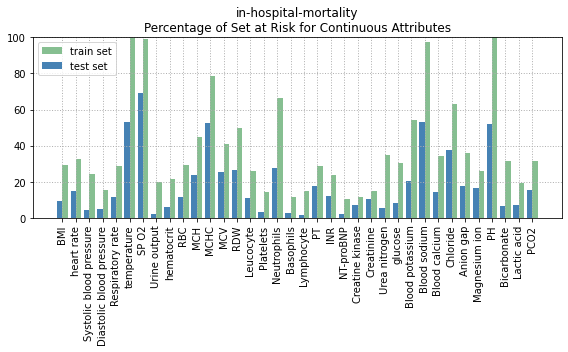

In [8]:
aia.plot_continuous_risk(results)

## Hospital dataset - SafeRandomForestClassifier

In [9]:
# train model
target = SafeRandomForestClassifier(bootstrap=False, random_state=R_STATE)
target.fit(dataset.x_train, dataset.y_train)
acc_train = target.score(dataset.x_train, dataset.y_train)
acc_test = target.score(dataset.x_test, dataset.y_test)
print(f"Base model train accuracy: {acc_train}")
print(f"Base model test accuracy: {acc_test}")

- parameter bootstrap = False identified as different than the recommended fixed value of True.
Changed parameter bootstrap = True.
- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.
Changed parameter min_samples_leaf = 5.

Base model train accuracy: 0.9112149532710281
Base model test accuracy: 0.8551401869158879


In [10]:
# perform attacks
results = aia.attribute_inference(target, dataset, report=True)

INFO:aia:Attacking dataset: in-hospital-mortality
INFO:aia:Attacking categorical attributes...
INFO:aia:Attacking continuous attributes...


Attacking categorical feature age with 60 unique values:
Correctly inferred 0.00% of 4.21% of the training set; baseline: 11.68%
Correctly inferred 0.00% of 4.67% of the test set; baseline: 7.48%

Attacking categorical feature gendera with 2 unique values:
Correctly inferred 60.00% of 32.71% of the training set; baseline: 50.00%
Correctly inferred 52.50% of 37.38% of the test set; baseline: 53.27%

Attacking categorical feature hypertensive with 2 unique values:
Correctly inferred 67.57% of 17.29% of the training set; baseline: 71.50%
Correctly inferred 69.05% of 19.63% of the test set; baseline: 69.16%

Attacking categorical feature atrialfibrillation with 2 unique values:
Correctly inferred 54.05% of 17.29% of the training set; baseline: 60.75%
Correctly inferred 37.78% of 21.03% of the test set; baseline: 54.67%

Attacking categorical feature CHD with no MI with 2 unique values:
Unable to make any inferences of the training set
Unable to make any inferences of the test set

Attackin

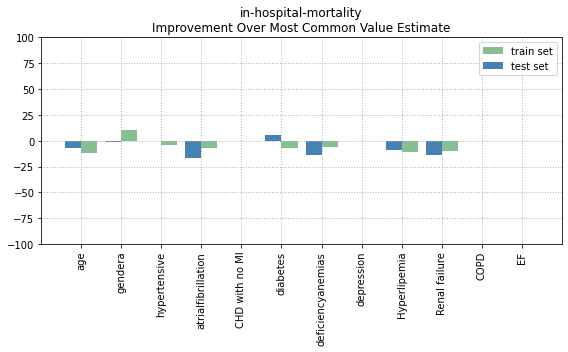

In [11]:
aia.plot_categorical_risk(results)

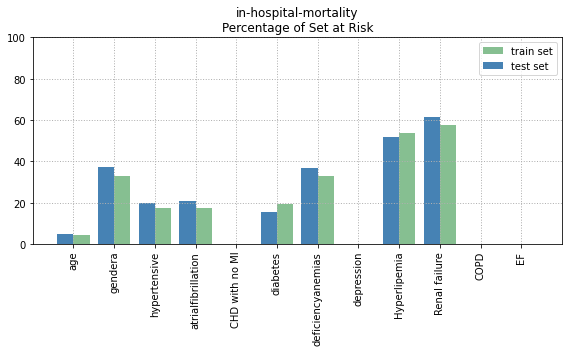

In [12]:
aia.plot_categorical_fraction(results)

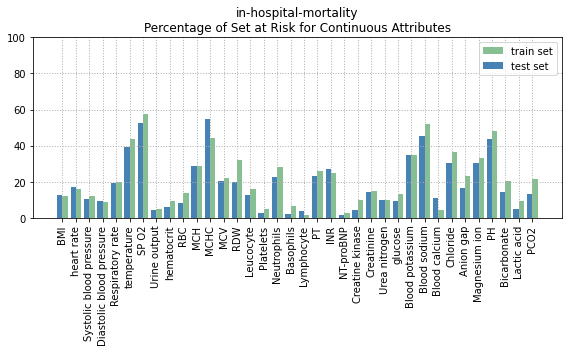

In [13]:
aia.plot_continuous_risk(results)

## Nursery dataset

In [14]:
dataset = NurseryData(R_STATE)

INFO:data:{0: {'name': 'parents', 'indices': [0, 1, 2], 'encoding': 'onehot'}, 1: {'name': 'has_nurs', 'indices': [3, 4, 5, 6, 7], 'encoding': 'onehot'}, 2: {'name': 'form', 'indices': [8, 9, 10, 11], 'encoding': 'onehot'}, 3: {'name': 'children', 'indices': [12, 13, 14, 15], 'encoding': 'onehot'}, 4: {'name': 'housing', 'indices': [16, 17, 18], 'encoding': 'onehot'}, 5: {'name': 'finance', 'indices': [19, 20], 'encoding': 'onehot'}, 6: {'name': 'social', 'indices': [21, 22, 23], 'encoding': 'onehot'}, 7: {'name': 'health', 'indices': [24, 25, 26], 'encoding': 'onehot'}}
INFO:data:x_train shape = (6480, 27)
INFO:data:y_train shape = (6480,)
INFO:data:x_test shape = (6480, 27)
INFO:data:y_test shape = (6480,)


In [15]:
dataset.data.describe()

,parents,has_nurs,form,children,housing,finance,social,health
count,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended
freq,4320,2592,3240,3240,4320,6480,4320,4320


In [16]:
# train model
target = RandomForestClassifier(bootstrap=False, random_state=R_STATE)
target.fit(dataset.x_train, dataset.y_train)
acc_train = target.score(dataset.x_train, dataset.y_train)
acc_test = target.score(dataset.x_test, dataset.y_test)
print(f"Base model train accuracy: {acc_train}")
print(f"Base model test accuracy: {acc_test}")

Base model train accuracy: 1.0
Base model test accuracy: 0.984104938271605


In [17]:
# perform attacks
results = aia.attribute_inference(target, dataset, report=True)

INFO:aia:Attacking dataset: Nursery
INFO:aia:Attacking categorical attributes...
INFO:aia:Attacking continuous attributes...


Attacking categorical feature parents with 3 unique values:
Correctly inferred 100.00% of 29.24% of the training set; baseline: 33.55%
Correctly inferred 34.75% of 56.98% of the test set; baseline: 33.72%

Attacking categorical feature has_nurs with 5 unique values:
Correctly inferred 100.00% of 17.02% of the training set; baseline: 20.32%
Correctly inferred 21.08% of 40.48% of the test set; baseline: 20.35%

Attacking categorical feature form with 4 unique values:
Correctly inferred 100.00% of 10.71% of the training set; baseline: 25.42%
Correctly inferred 12.07% of 32.85% of the test set; baseline: 25.26%

Attacking categorical feature children with 4 unique values:
Correctly inferred 100.00% of 12.27% of the training set; baseline: 25.90%
Correctly inferred 14.05% of 34.37% of the test set; baseline: 25.63%

Attacking categorical feature housing with 3 unique values:
Correctly inferred 100.00% of 23.09% of the training set; baseline: 33.47%
Correctly inferred 24.13% of 51.73% of the

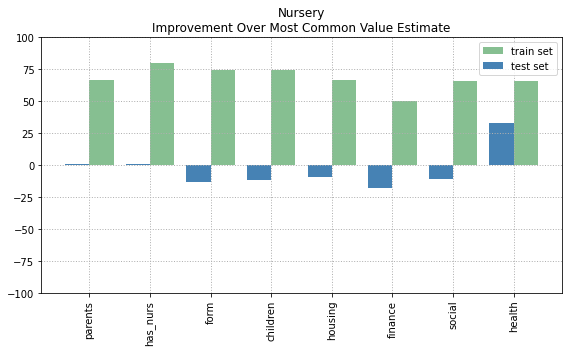

In [18]:
aia.plot_categorical_risk(results)

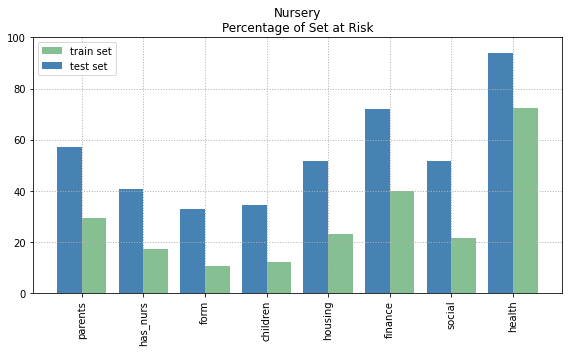

In [19]:
aia.plot_categorical_fraction(results)

## Nursery dataset - SafeRandomForestClassifier

In [21]:
# train model
target = SafeRandomForestClassifier(bootstrap=False, random_state=R_STATE)
target.fit(dataset.x_train, dataset.y_train)
acc_train = target.score(dataset.x_train, dataset.y_train)
acc_test = target.score(dataset.x_test, dataset.y_test)
print(f"Base model train accuracy: {acc_train}")
print(f"Base model test accuracy: {acc_test}")

- parameter bootstrap = False identified as different than the recommended fixed value of True.
Changed parameter bootstrap = True.
- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.
Changed parameter min_samples_leaf = 5.

Base model train accuracy: 0.9776234567901234
Base model test accuracy: 0.961574074074074


In [22]:
# perform attacks
results = aia.attribute_inference(target, dataset, report=True)

INFO:aia:Attacking dataset: Nursery
INFO:aia:Attacking categorical attributes...
INFO:aia:Attacking continuous attributes...


Attacking categorical feature parents with 3 unique values:
Correctly inferred 46.98% of 99.78% of the training set; baseline: 33.55%
Correctly inferred 41.39% of 99.80% of the test set; baseline: 33.72%

Attacking categorical feature has_nurs with 5 unique values:
Correctly inferred 33.51% of 99.52% of the training set; baseline: 20.32%
Correctly inferred 28.46% of 99.55% of the test set; baseline: 20.35%

Attacking categorical feature form with 4 unique values:
Correctly inferred 30.71% of 94.48% of the training set; baseline: 25.42%
Correctly inferred 21.38% of 93.98% of the test set; baseline: 25.26%

Attacking categorical feature children with 4 unique values:
Correctly inferred 31.63% of 96.20% of the training set; baseline: 25.90%
Correctly inferred 23.01% of 95.90% of the test set; baseline: 25.63%

Attacking categorical feature housing with 3 unique values:
Correctly inferred 42.49% of 98.13% of the training set; baseline: 33.47%
Correctly inferred 35.49% of 97.98% of the test

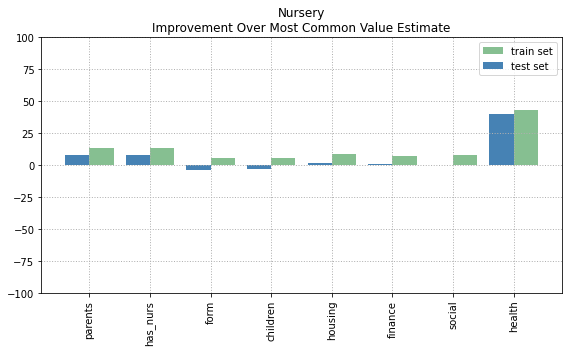

In [23]:
aia.plot_categorical_risk(results)

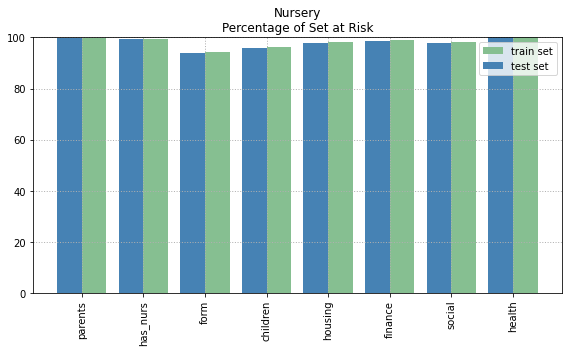

In [24]:
aia.plot_categorical_fraction(results)